# Projet IMI 1 ECTS

Auriane Riou, Louis Lesueur

In [1]:
# System
import gc
import os
import sys
from pathlib import Path

# Cpu
from collections import Counter
import numpy as np
import pandas as pd

# Data viz
from IPython.display import Image, display, HTML
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pprint
import seaborn as sns
from sklearn.cluster import MeanShift

from cv2 import cvtColor, COLOR_RGB2Lab, COLOR_Lab2RGB
from collections import Counter

plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.edgecolor'] = 'k'
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.facecolor'] = 'w'
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['figure.figsize'] = (16, 9)

    
display(HTML("<style>.container { width:95% !important; }</style>"))

## Lecture des données

In [11]:
class Illustrations():
    """
    Classe pour charger les données
    """
    
    def __init__(self,project_dir):
        self.path = Path(project_dir) / 'raw_data'
        self.manuscripts = np.array(sorted(list(filter(lambda p: p.is_dir(), self.path.glob('*')))))
        self.illuminations = np.array([sorted(manuscript.glob('**/*.jpg')) for manuscript in self.manuscripts])
        
    def open_illu(self,i,j):
        """
        Fonction qui permet d'accéder à l'image (i,j) sous forme de dataset pandas
        """
        df = pd.DataFrame(columns=['a', 'b'])
        arr = np.array(Image.open(self.illuminations[i,j]))
        ab = np.reshape(cvtColor(arr, COLOR_RGB2Lab)[:,:,1:], (-1, 2)).tolist()
        df = pd.concat([df, pd.DataFrame(ab, columns=['a', 'b'])], ignore_index=True)
        df['ab'] = list(map(tuple, df.values.tolist()))
        return df
    
    def print_illu(self,i,j):
        """
        Simple affichage de l'image (i,j)
        """
        plt.imshow(Image.open(self.illuminations[i,j]))
        
    def ms_illu(self,i,j,sample_size=1000, bandwidth=10):
        """
        Pour faire un clustering meanshift sur le dataset
        """
        df = self.open_illu(i,j)
        sample = df.sample(sample_size)
        cluster = MeanShift(bandwidth=bandwidth, n_jobs=-1).fit(sample[['a', 'b']])
        unique_labels = np.unique(cluster.labels_)
        return len(unique_labels)

In [12]:
Ill = Illustrations('')

## Tests sur une image

Simple test des diverses méthodes de la classe sur une image du dataset.

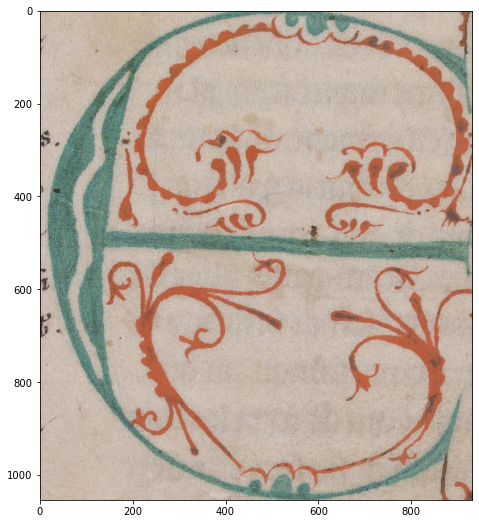

In [13]:
Ill.print_illu(2,2)

In [14]:
Ill.ms_illu(2,2)

4

## Clustering sur tout le dataset

In [19]:
class MsClustering():
    """
    Classe pour faire le clustering et les prédictions
    """
    
    def __init__(self,bandwidth=10, samples=1000):
        self.illustrations = None
        self.clusters = None
        self.bandwidth = bandwidth
        self.samples = samples
                
    def fit(self,illustrations,verbose=True):
        """
        Pour faire le clustering et créer le modèle
        """
        self.illustrations = illustrations
        n,m = illustrations.illuminations.shape
        self.clusters = np.zeros(Ill.illuminations.shape)
        
        #clustering
        for i in range(n):
            if verbose:
                print(f'step: {i+1}/{n}\r', sep=' ', end='', flush=True)
            for j in range(m):
                self.clusters[i,j] = Ill.ms_illu(i,j,self.samples,self.bandwidth)
        
        #TODO: Trouver un modèle pour fiter les données
                        
                
    def predict(self, nb_clusters):
        """
        Fonction qui donne l'atelier en fonction du nombre de clusters
        """
        # code a écrire
        return None
    
    def print_clusters(self):
        """
        Simple fonction d'afichage
        """
        fig, ax = plt.subplots()
        im = ax.imshow(self.clusters)
        
        for i in range(self.clusters.shape[0]):
            for j in range(self.clusters.shape[1]):
                text = ax.text(j, i, self.clusters[i, j],
                               ha="center", va="center", color="w")
                
        plt.title(f"nombre de clusters, ms bandwith: {BD}")
        plt.xlabel("enluminure")
        plt.ylabel("manuscrit")
        plt.show()

Dans un premier temps, on lance le clustering sur l'ensemble du dataset

In [21]:
#paramètres mean shift
BD = 5
SAMPLES = 500
MS = MsClustering(BD,SAMPLES)

In [22]:
#Assez long
MS.fit(Ill)

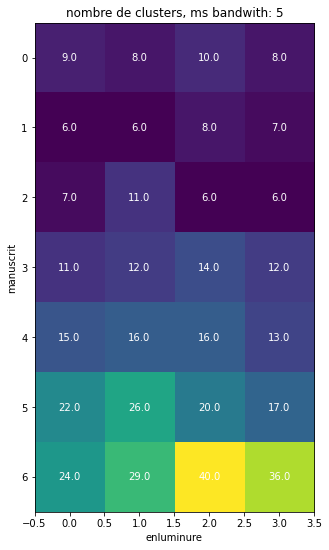

In [23]:
#Affichage des clusters
MS.print_clusters()